In [ ]:
!pip install pyserial
!pip install hvplot
!pip install streamz
!pip install pandas
!pip install datetime
!pip install matplotlib
!pip install numpy

     |████████████████████████████████| 92kB 4.8MB/s 
     |████████████████████████████████| 3.1MB 8.8MB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 256kB 17.9MB/s 


In [20]:
from serial import Serial
import serial.tools.list_ports
import hvplot.streamz
from streamz.dataframe import DataFrame
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import time
import os

In [21]:
buffer_size = 4 # update every 0.5 seconds 

def unpack_serial_line(line, expected_entries, sep='\t'):
    line = line.decode("utf-8").strip()
    entries = line.split(sep)
    if len(entries) != len(expected_entries):
        print(f"Skipping line: {line}.\n Incorrect number of entries, "
              f"expected {len(expected_entries)}, found {len(entries)}.")
        return False
    for i, entry in enumerate(entries):
        try:
            entries[i] = float(entry)
        except ValueError as e:
            print(f"Skipping line: {line}.\n {e}.")
            return False
    return entries

# Module #1


---


## We learned that sensors convert a physical quantity (movement) into an electrical signal.





In [22]:
#Connect the Arduino Nano 33 IoT to your computer.  
# list available com ports, choose one in the next
print('Available Serial Ports:')
ports = []
for i, port in enumerate(serial.tools.list_ports.comports()):
    ports.append(port.device)
    print(f"({i})\tport={port.device}  description={port.description}")

Available Serial Ports:
(0)	port=/dev/cu.Bluetooth-Incoming-Port  description=n/a
(1)	port=/dev/cu.usbmodem141301  description=Arduino NANO 33 IoT


In [23]:
# Set this to the correct port index based on what is printed above
arduino_port = ports[1]
arduino_baudrate = 115200

In [26]:
#Connect the Arduino Nano 33 IoT to your computer.  
port = Serial(port=arduino_port, baudrate=arduino_baudrate)
port.flushInput()
port.flushOutput()
# Possible errors: 
# "Resource busy": close the serial window in the Arduino IDE and try again

## Let's use our arduino to measure acceleration and visualize those electrical signals. 


---



*   Plug in your arduino
*   Rest it on the table and collect ~ 10 sec of data
*   What do the signals look like?
*   What happens if we move around the device?


In [ ]:
cols = ['t','x','y','z']
df_example = pd.DataFrame(columns=cols)
df = DataFrame(example=df_example)
df.hvplot(x='t', backlog=50, kind='scatter') * df.hvplot(x='t', backlog=50, kind='line')

In [ ]:
#for i in range(30): # Option 2: read 30 samples and then stop
while(True): #stream forever.  must use "Kernel" --> "Interrupt" to stop
    buffer = []
    for i in range(buffer_size):
        entries = unpack_serial_line(port.readline(), cols)
        if entries:
            buffer.append(entries)
    df_buffer = pd.DataFrame(buffer, columns=cols)
    df_buffer["t"] /= 1000.# convert from milliseconds to seconds
    df.emit(df_buffer)


## Let's move our accelerometer up and down, in a single plane: 5 times

---
Tips:

*   Hold the accelerometer in two hands, as steady as possible
*   Do you best to only move the device up and down, no side to side or forward, backward motion


---




Which line shows the greatest amount of motion?










In [ ]:
df.hvplot(x='t', backlog=50, kind='scatter') * df.hvplot(x='t', backlog=50, kind='line')

In [ ]:
#for i in range(30): # Option 2: read 30 samples and then stop
while(True): #stream forever.  must use "Kernel" --> "Interrupt" to stop
    buffer = []
    for i in range(buffer_size):
        entries = unpack_serial_line(port.readline(), cols)
        if entries:
            buffer.append(entries)
    df_buffer = pd.DataFrame(buffer, columns=cols)
    df_buffer["t"] /= 1000.# convert from milliseconds to seconds
    df.emit(df_buffer)

## Let's move our accelerometer forward and back (short side facing forward), in a single plane: 5 times

Which line shows the greatest amount of motion?

In [ ]:
df.hvplot(x='t', backlog=50, kind='scatter') * df.hvplot(x='t', backlog=50, kind='line')

In [ ]:
#for i in range(30): # Option 2: read 30 samples and then stop
while(True): #stream forever.  must use "Kernel" --> "Interrupt" to stop
    buffer = []
    for i in range(buffer_size):
        entries = unpack_serial_line(port.readline(), cols)
        if entries:
            buffer.append(entries)
    df_buffer = pd.DataFrame(buffer, columns=cols)
    df_buffer["t"] /= 1000.# convert from milliseconds to seconds
    df.emit(df_buffer)

## Let's move our accelerometer side to side (long side facing forward), in a single plane: 5 times

Which line shows the greatest amount of motion?

In [ ]:
df.hvplot(x='t', backlog=50, kind='scatter') * df.hvplot(x='t', backlog=50, kind='line')

In [ ]:
#for i in range(30): # Option 2: read 30 samples and then stop
while(True): #stream forever.  must use "Kernel" --> "Interrupt" to stop
    buffer = []
    for i in range(buffer_size):
        entries = unpack_serial_line(port.readline(), cols)
        if entries:
            buffer.append(entries)
    df_buffer = pd.DataFrame(buffer, columns=cols)
    df_buffer["t"] /= 1000.# convert from milliseconds to seconds
    df.emit(df_buffer)

## We learned that acceleration is velocity over time. What do we think would happen to the signals if we increased the speed of how fast we were moving?

In [ ]:
df.hvplot(x='t', backlog=50, kind='scatter') * df.hvplot(x='t', backlog=50, kind='line')

In [ ]:
#for i in range(30): # Option 2: read 30 samples and then stop
while(True): #stream forever.  must use "Kernel" --> "Interrupt" to stop
    buffer = []
    for i in range(buffer_size):
        entries = unpack_serial_line(port.readline(), cols)
        if entries:
            buffer.append(entries)
    df_buffer = pd.DataFrame(buffer, columns=cols)
    df_buffer["t"] /= 1000.# convert from milliseconds to seconds
    df.emit(df_buffer)

## Now that we know about the 3 axes of movement, what kind of movement do you think could generate this plot?

Saving challenge.csv to challenge.csv


Text(0, 0.5, 'Acceleration (m/sec^2)')

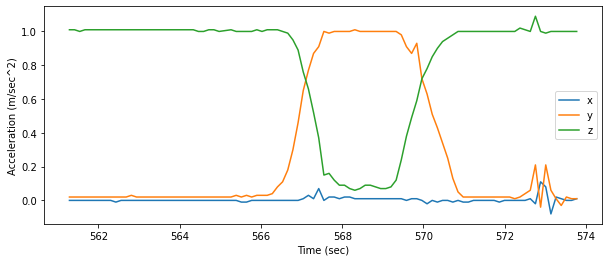

In [ ]:
from google.colab import files
uploaded_file = files.upload()
data = pd.read_csv(io.StringIO(uploaded_file['challenge.csv'].decode('utf-8')))

#plot accelerometer data in all 3 directions
data.plot(x='t', figsize=(10,4))
plt.xlabel('Time (sec)'), 
plt.ylabel('Acceleration (m/sec^2)')

# Module #2


---



## We learned that we collect acceleration in 3 axes: 

Let's orient our device so that when it collects data we're moving in the right direction

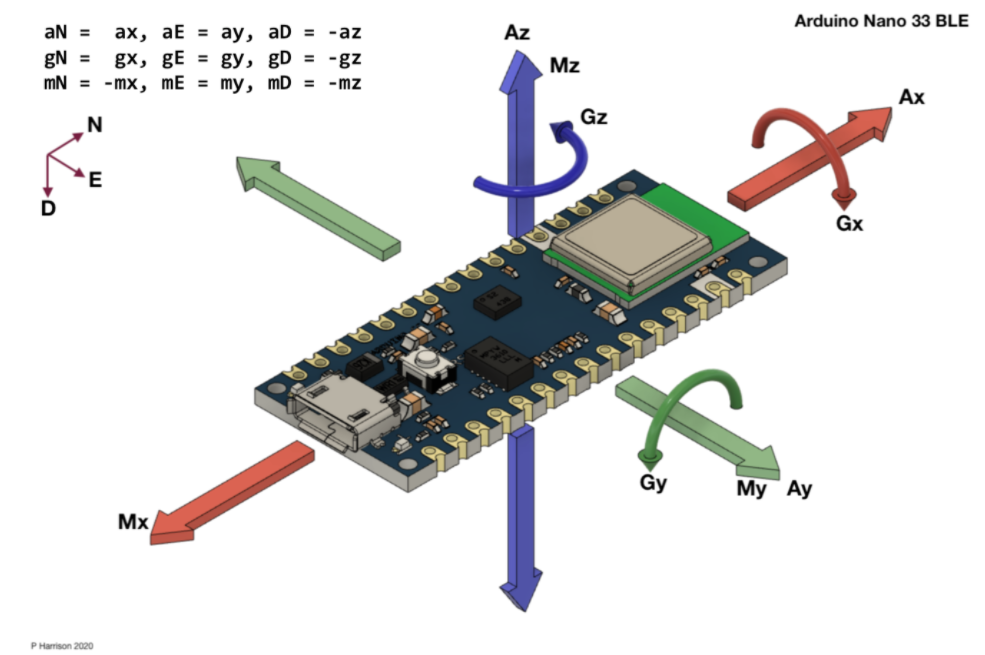

# And now let's collect movement: 
# What does acceleration look like when stepping?



*   Plug in your arduino
*   Stand up (be mindful of the USB cable length)
*   Hold your arduino in your right hand
*   Standing in place: take 10 steps, **with** an arm swing





In [ ]:
trial_name = 'Stepping with an Arm Swing'
num_samples = 100 # ~10-15 seconds
expected_cols = ['t','x','y','z']

# Note on collecting data:
# unplug / plug in arduino, or press reset button to reset buffer for each data trial
# is there a better way?? otherwise the already queued data gets read rather than realtime data
port = Serial(port=arduino_port, baudrate=arduino_baudrate)
port.flushInput()
port.flushOutput()

# Read data
t0 = time.time()
data = []
for n in range(num_samples): 
    entries = unpack_serial_line(port.readline(), expected_cols)
    if entries:
        data.append(entries)
print(f"Finished: {trial_name}\n"
      f"Collected {len(data)} samples in {time.time() - t0} seconds.")

# Convert raw data to dataframe, save as csv and plot
data = pd.DataFrame(data, columns=expected_cols)
data["t"] /= 1000.# convert from milliseconds to seconds
data = data.set_index('t')
#csv_filename = data_folder+f"{trial_name}.csv"
#data.to_csv(csv_filename)
print(f"Saved csv file: {csv_filename}")
data.plot(figsize=(20, 5), title=trial_name)
plt.show()
data

## What can we observe? 

*   Can we see 10 peaks in the signal? Why do we think that is?
*   Which of the 3 axes are the most pronounced? Why do we think that is? 




# What if we did not swing our arms?

*   Standing in place: take 10 steps, **without** an arm swing
*   Save the data as a .csv





In [ ]:
trial_name = 'Steppung without an Arm Swing'
data_folder = 'test_data/'
num_samples = 100 # ~10-15 seconds
expected_cols = ['t','x','y','z']

# Note on collecting data:
# unplug / plug in arduino, or press reset button to reset buffer for each data trial
# is there a better way?? otherwise the already queued data gets read rather than realtime data
port = Serial(port=arduino_port, baudrate=arduino_baudrate)
port.flushInput()
port.flushOutput()

# Read data
t0 = time.time()
data = []
for n in range(num_samples): 
    entries = unpack_serial_line(port.readline(), expected_cols)
    if entries:
        data.append(entries)
print(f"Finished: {trial_name}\n"
      f"Collected {len(data)} samples in {time.time() - t0} seconds.")

# Convert raw data to dataframe, save as csv and plot
data = pd.DataFrame(data, columns=expected_cols)
data["t"] /= 1000.# convert from milliseconds to seconds
data = data.set_index('t')
#csv_filename = data_folder+f"{trial_name}.csv"
#data.to_csv(csv_filename)
print(f"Saved csv file: {csv_filename}")
data.plot(figsize=(20, 5), title=trial_name)
plt.show()
data


## What can we observe?

*   Can we see 10 peaks in the signal?
*   How is this signal different? Why do we think that is?

# What changes can we anticipate if we change the speed of our steps?

*   Standing in place: take 10 **fast** steps, **with** an arm swing

In [ ]:
trial_name = '10 fast steps'
data_folder = 'test_data/'
num_samples = 100 # ~10-15 seconds
expected_cols = ['t','x','y','z']

# Note on collecting data:
# unplug / plug in arduino, or press reset button to reset buffer for each data trial
# is there a better way?? otherwise the already queued data gets read rather than realtime data
port = Serial(port=arduino_port, baudrate=arduino_baudrate)
port.flushInput()
port.flushOutput()

# Read data
t0 = time.time()
data = []
for n in range(num_samples): 
    entries = unpack_serial_line(port.readline(), expected_cols)
    if entries:
        data.append(entries)
print(f"Finished: {trial_name}\n"
      f"Collected {len(data)} samples in {time.time() - t0} seconds.")

# Convert raw data to dataframe, save as csv and plot
data = pd.DataFrame(data, columns=expected_cols)
data["t"] /= 1000.# convert from milliseconds to seconds
data = data.set_index('t')
#csv_filename = data_folder+f"{trial_name}.csv"
#data.to_csv(csv_filename)
print(f"Saved csv file: {csv_filename}")
data.plot(figsize=(20, 5), title=trial_name)
plt.show()
data

## What is different in the signal when the steps are faster?

*   What do we notice in terms of the height of the peaks?
*   What do we notice in terms of the spacing of the peaks?

# We saw that it's easier to detect steps in certain conditions over others. 

*   What could make it even easier to pick up steps using an accelerometer?
*   What kind of motions would make it harder to see steps?


## Now let's think about how we can use the characteristics of these signals to identify when steps occur.